In [1]:
import pandas as pd
import zipfile
import csv
import edgar_utils
import re
import bisect
import netaddr
import json
from graphviz import Graph, Digraph
import graphviz
import geopandas as gpd
from shapely.geometry import Point, Polygon, box

In [2]:
#Q1
zip_file_path = 'server_log.zip'
csv_file_name = 'rows.csv'
total_size = 0

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(csv_file_name) as csv_file:
        csv_reader = csv.DictReader(line.decode('utf-8') for line in csv_file)
        for row in csv_reader:
            total_size += float(row['size'])

int(total_size)

24801002666

In [3]:
#Q2
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(csv_file_name) as csv_file:
        df = pd.read_csv(csv_file)

ip_counts = df.groupby('ip').size()
top_ips = ip_counts.nlargest(10)
top_ips = top_ips.to_dict()

top_ips

{'54.152.17.ccg': 12562,
 '183.195.251.hah': 6524,
 '52.45.218.ihf': 5562,
 '68.180.231.abf': 5493,
 '204.212.175.bch': 4708,
 '103.238.106.gif': 4428,
 '208.77.215.jeh': 3903,
 '208.77.214.jeh': 3806,
 '217.174.255.dgd': 3551,
 '82.13.163.caf': 3527}

In [4]:
#Q3
total_reqs = len(df)
error_reqs = df[df['code'] >= 400]

num_error_reqs = len(error_reqs)

error_fraction = num_error_reqs / total_reqs
error_fraction

0.03466852724527611

In [5]:
#Q4
df['cik'] = df['cik'].astype(float).astype(int).astype(str)
df['accession'] = df['accession'].astype(str)
df['extention'] = df['extention'].astype(str)
df['file'] = df['cik'] + '/' + df['accession'] + '/' + df['extention']

access_counts = df['file'].value_counts()
second_file = access_counts.index[1]
second_file

'1584509/0001584509-16-000514/armk-20160930_def.xml'

In [6]:
#Q5
first_key = next(iter(top_ips.keys()))
edgar_utils.lookup_region(first_key)

'United States of America'

In [7]:
#Q6
ip_dict = pd.read_csv('mp5-key.csv')
dict_ans = ip_dict['value'][5]
json_str = dict_ans.replace("'", '"')
result_dict = json.loads(json_str)
result_dict


{'-': 0.0,
 'Algeria': 0.0,
 'Angola': 0.0,
 'Armenia': 0.0,
 'Australia': 0.07692307692307693,
 'Austria': 0.0,
 'Bangladesh': 0.0,
 'Brazil': 0.0,
 'Bulgaria': 0.3333333333333333,
 'Canada': 0.05357142857142857,
 'China': 0.016018306636155607,
 'Croatia': 0.0,
 'Cyprus': 0.0,
 'Czechia': 0.3333333333333333,
 'Denmark': 0.0,
 'Egypt': 0.0,
 'Estonia': 0.0,
 'Finland': 0.0,
 'France': 0.0036900369003690036,
 'Germany': 0.047619047619047616,
 'Greece': 0.0,
 'Honduras': 0.0,
 'Hong Kong': 0.037037037037037035,
 'Hungary': 0.0,
 'India': 0.08823529411764706,
 'Indonesia': 0.0,
 'Iraq': 0.0,
 'Ireland': 0.625,
 'Israel': 0.0,
 'Italy': 0.0,
 'Japan': 0.0,
 'Jersey': 0.0,
 'Jordan': 0.0,
 'Korea (Republic of)': 0.2,
 'Latvia': 0.0,
 'Lebanon': 0.0,
 'Liberia': 0.0,
 'Luxembourg': 0.0,
 'Malaysia': 0.0,
 'Mexico': 0.0,
 'Mongolia': 0.0,
 'Morocco': 0.0,
 'Netherlands': 0.0,
 'Nigeria': 0.0,
 'North Macedonia': 0.0,
 'Pakistan': 0.0,
 'Philippines': 0.0,
 'Poland': 0.0,
 'Portugal': 0.0,
 'R

In [8]:
filing = {}
with zipfile.ZipFile('docs.zip', 'r') as zf:
    for name in zf.namelist():
        if name.endswith('.htm') or name.endswith('.html'):
            with zf.open(name) as f:
                html_content = f.read().decode('utf-8')
            filing_object = edgar_utils.Filing(html_content)
            filing[name] = filing_object

In [9]:
#Q7
file_path = '886982/0000769993-16-001958/-index.htm'
dates = []
if file_path in filing:
    dates = filing[file_path].dates
dates

['2016-12-30', '2016-12-30', '2016-12-20']

In [10]:
#Q8
state_count = {}
for filing_info in filing.values():
    state = filing_info.state()
    if state in state_count:
        state_count[state] += 1
    else: 
        state_count[state] = 1
state_count

{'CA': 92,
 'NJ': 23,
 'MS': 1,
 'MA': 30,
 'CO': 25,
 'NY': 83,
 None: 56,
 'TX': 67,
 'FL': 21,
 'AL': 1,
 'IN': 5,
 'CT': 14,
 'UT': 5,
 'MD': 13,
 'KS': 5,
 'VA': 15,
 'OH': 10,
 'SD': 1,
 'DE': 9,
 'IL': 25,
 'GA': 9,
 'NC': 9,
 'PA': 25,
 'TN': 4,
 'MN': 15,
 'NM': 1,
 'KY': 2,
 'OK': 7,
 'AR': 1,
 'NV': 6,
 'VT': 1,
 'MO': 4,
 'MI': 11,
 'NE': 2,
 'IA': 6,
 'AZ': 5,
 'WI': 9,
 'LA': 2,
 'ID': 1,
 'OR': 2,
 'WV': 2,
 'WA': 3,
 'DC': 1,
 'ME': 1}

In [11]:
#Q9
address_counts = {}
for filings in filing.values():
    for address in filings.addresses:
        if address in address_counts:
            address_counts[address] += 1
        else:
            address_counts[address] = 1
sorted_addresses = sorted(address_counts.items(), key=lambda x: x[1], reverse=True)
top_10_addresses = dict(sorted_addresses[:10])
top_10_addresses

{'2000 AVENUE OF THE STARS, 12TH FLOOR\nLOS ANGELES CA 90067': 134,
 '2000 AVENUE OF THE STARS, 12TH FLOOR\nLOS ANGELES CA 90067\n3102014100': 113,
 '3 LANDMARK SQUARE\nSUITE 500\nSTAMFORD CT 06901\n2033564400': 60,
 'C/O KKR ASSET MANAGEMENT LLC\n555 CALIFORNIA STREET, 50TH FLOOR\nSAN FRANCISCO CA 94104': 36,
 'C/O ARES MANAGEMENT LLC\n2000 AVENUE OF THE STARS, 12TH FLOOR\nLOS ANGELES CA 90067': 35,
 '4740 AGAR DRIVE\nRICHMOND A1 V7B 1A3': 25,
 'CENTRALIS S.A., 8-10 AVENUE DE LA GARE\nLUXEMBOURG N4 L-1610': 25,
 'CENTRALIS S.A., 8-10 AVENUE DE LA GARE\nLUXEMBOURG N4 L-1610\n352-26-186-1': 25,
 '3 LANDMARK SQUARE\nSUITE 500\nSTAMFORD CT 06901': 24,
 '801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102': 22}

In [12]:
#Q10
x = {}

for row in df["file"]:
    if row in filing and filing[row].sic != None:
        if row in filing.keys():
            if filing[row].sic not in x:
                x[filing[row].sic] = 1
            else:
                x[filing[row].sic] += 1 
        
sorted_master_sic_dict = sorted(x.items(), key=lambda x:x[1], reverse=True)
dict(sorted_master_sic_dict)

{2834: 984,
 1389: 656,
 1311: 550,
 2836: 429,
 6022: 379,
 1000: 273,
 6211: 237,
 7371: 229,
 2860: 226,
 6021: 204,
 6282: 171,
 2510: 171,
 3825: 164,
 4841: 108,
 5621: 99,
 7200: 94,
 7374: 94,
 6331: 91,
 6798: 90,
 5311: 90,
 3842: 87,
 6221: 85,
 6029: 83,
 3272: 81,
 3829: 73,
 4931: 70,
 3510: 66,
 7830: 62,
 3826: 56,
 3695: 55,
 3620: 50,
 7373: 48,
 6799: 46,
 4412: 43,
 4512: 42,
 7340: 40,
 7370: 39,
 900: 39,
 6513: 38,
 3621: 38,
 5172: 36,
 5900: 35,
 4213: 35,
 3990: 34,
 5122: 34,
 5944: 33,
 2070: 33,
 8090: 32,
 1700: 31,
 3312: 31,
 1381: 31,
 4922: 31,
 6324: 30,
 8742: 27,
 7389: 26,
 8731: 25,
 7812: 25,
 3590: 24,
 4955: 23,
 3663: 23,
 4522: 22,
 6321: 21,
 3559: 20,
 5812: 19,
 6792: 19,
 6189: 18,
 7372: 16,
 3841: 14,
 6199: 11,
 1731: 11,
 4911: 8,
 4833: 7,
 6035: 7,
 3571: 6,
 2430: 6,
 3679: 5,
 3674: 5,
 4813: 4,
 3678: 4,
 4812: 4,
 1531: 4,
 5500: 4,
 6411: 3,
 1400: 3,
 2800: 3,
 3420: 3,
 8062: 3,
 3576: 3,
 2870: 2,
 1040: 2,
 8711: 2,
 3669: 

In [13]:
#Q11
datetime = pd.to_datetime(df["time"])
each_hour = {}
for i in range(24):
    each_hour[i] = 0
for time in datetime:
    hour = int(re.findall(r"(\d{2}):\d{2}:\d{2}", str(time))[0])
    if hour not in each_hour.keys():
        each_hour[hour] = 1
    else:
        each_hour[hour] += 1
each_hour

/tmp/ipykernel_914580/1517482309.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime = pd.to_datetime(df["time"])


{0: 8305,
 1: 8242,
 2: 8550,
 3: 8850,
 4: 8343,
 5: 9783,
 6: 7761,
 7: 8213,
 8: 8292,
 9: 11033,
 10: 6377,
 11: 6435,
 12: 6155,
 13: 6006,
 14: 6654,
 15: 6512,
 16: 5680,
 17: 6487,
 18: 6356,
 19: 6211,
 20: 6066,
 21: 6164,
 22: 6098,
 23: 6283}

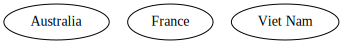

In [14]:
#Q12
country_files = {"Australia":[],"France":[],"Viet Nam":[]}
for ip in top_ips.keys():
    region = edgar_utils.lookup_region(ip)
    if region in ["Australia","France","Viet Nam"]:
        ip_df = df[df["ip"] == ip]
        ip_cik = ip_df["cik"].reset_index()
        del ip_cik["index"]
        ip_accession = ip_df["accession"].reset_index()
        del ip_accession["index"]
        ip_extention = ip_df["extention"].reset_index()
        del ip_extention["index"]
        for i in range(len(ip_cik)):
            file = str(int(ip_cik.loc[i]["cik"])) + "/" + str(ip_accession.loc[i]["accession"]) + "/" + str(ip_extention.loc[i]["extention"])
            country_files[region].append(file) 
country_access = {"Australia":set(),"France":set(),"Viet Nam":set()}
for country in country_files.keys():
    files = country_files[country]
    for file in files:
        if file in docs.keys():
            country_access[country].add(docs[file].state())
graph = graphviz.Digraph()
for country in country_access.keys():
    graph.node(country)
    for state in country_access[country]:
        graph.node(state)
        graph.edge(country, state)
graph

In [15]:
#Q13
location_gdf = gpd.read_file('locations.geojson')
location_map = gpd.read_file("shapes/cb_2018_us_state_20m.shp")

address_list = []
for address in location_gdf["address"]:
    code = re.findall(r"(\d{5})(-\d{4})?$", address)
    if len(code) > 0:
        code = int(code[0][0])
        address_list.append(code)
    else:
        address_list.append(-1)
    
location_gdf["zipcode"] = address_list
location_gdf = location_gdf[location_gdf["zipcode"] >= 10000]
location_gdf = location_gdf[location_gdf["zipcode"] <= 60000]

country_window = box(-90, 50, -65, 25)
master_map = location_map.intersection(country_window)
master_map = master_map[~master_map.is_empty]
master_map.to_crs("EPSG:2022")

ax = master_map.plot(facecolor="lightgray")
dots = location_gdf[location_gdf["geometry"].within(country_window)]
dots = dots.to_crs(master_map.crs)
dots.plot(ax=ax, column="zipcode", legend=True, cmap="viridis")
ax.set_axis_off()